In [1]:
import sklearn

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')

In [2]:
def get_mnist():
    import ssl
    ssl._create_default_https_context = ssl._create_unverified_context

    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    return mnist["data"], mnist["target"]

In [6]:
X.dtypes

pixel1      float64
pixel2      float64
pixel3      float64
pixel4      float64
pixel5      float64
             ...   
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
pixel784    float64
Length: 784, dtype: object

In [3]:
X, y = get_mnist()
X.shape

c:\Users\Usuario\miniforge3\envs\mlm\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)

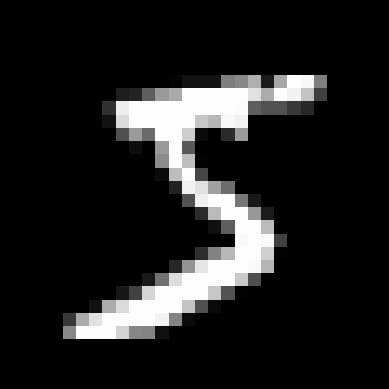

In [7]:
# plot a sample of the dataset

some_digit = X.loc[0,:].values
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.get_cmap('binary_r'), vmin=0, vmax=255)
plt.axis("off");

In [8]:
# review the 28x28 features
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [9]:
# cast labels to int
y = y.astype(np.uint8)

# Split Train Test subsets

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Evaluate Accuracy with a Binary Classifier

In [11]:
# change the labels to a "is 5" boolean label
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [12]:
# use a Stochastic Gradient Descent Classifier
# by default, it fits a linear support vector machine (SVM).
from sklearn.linear_model import SGDClassifier

# create instance
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# train the model
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [13]:
# predict
sgd_clf.predict([some_digit])

c:\Users\Usuario\miniforge3\envs\mlm\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [14]:
# try Cross Validation with Accuracy as score
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
# build a toy model that always predicts that an image is not a 5
# and check Accuracy

In [15]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

# create instance of model
never_5_clf = Never5Classifier()

# get accuracy from CV
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [16]:
100*(sum(y_train_5)/y_train.shape[0])

9.035

### Why is accuracy not so thrustworthy ?
- 90% Accuracy of the model!
- Only 9 % of train data is a 5

... Conclusion ?

# Confusion Matrix

In [17]:
# Get predictions from CV process and leave Test set untouched (for now)
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [18]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [25]:
# ideal confusion matrix
y_train_perfect_predictions = y_train_5  
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

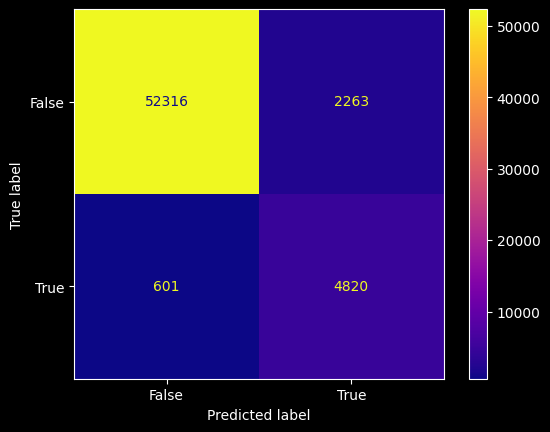

In [26]:
# Plot confusion matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(sgd_clf, X_train, y_train_5, cmap='plasma')
plt.show()

In [27]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [28]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [29]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [30]:
# F1 manual computation
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7325171197343847

In [31]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

c:\Users\Usuario\miniforge3\envs\mlm\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [32]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

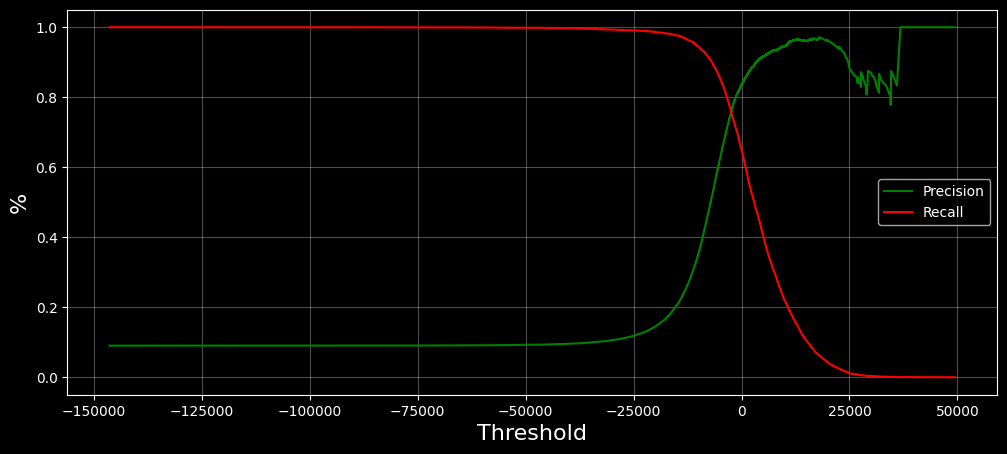

In [33]:
def plot_precision_vs_recall(precisions, recalls, thresholds):
    """
    """
    fig, ax = plt.subplots(1,1,figsize=(12,5))
    ax.plot(thresholds, precisions[:-1], "g-", label="Precision", linewidth=1.5)
    ax.plot(thresholds, recalls[:-1], "r-", label="Recall", linewidth=1.5)
    ax.legend(loc="center right", fontsize=10)
    ax.set_xlabel("Threshold", fontsize=16)
    ax.set_ylabel("%", fontsize=16)
    ax.grid(alpha=0.3)

plot_precision_vs_recall(precisions, recalls, thresholds)

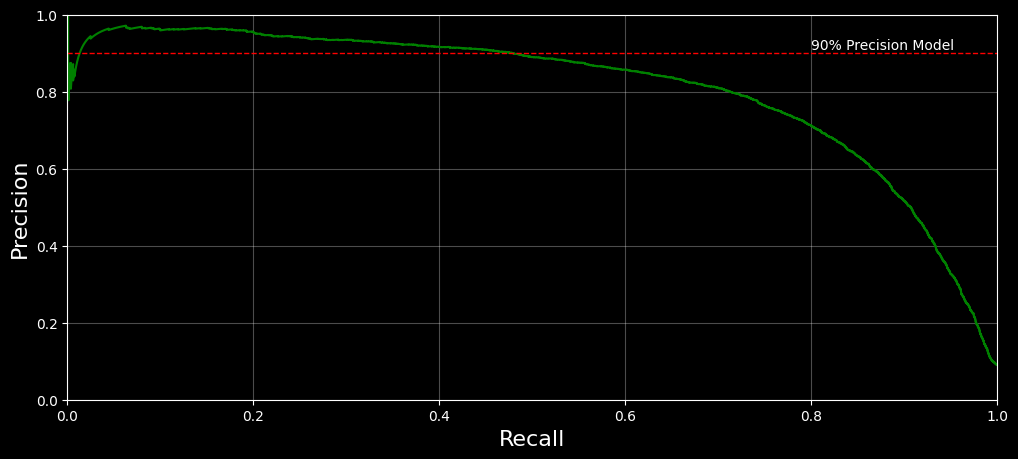

In [34]:
def plot_precision_vs_recall(precisions, recalls):
    """
    """
    fig, ax = plt.subplots(1,1,figsize=(12,5))
    ax.plot(recalls, precisions, "g-", linewidth=1.5)
    ax.set_xlabel("Recall", fontsize=16)
    ax.set_ylabel("Precision", fontsize=16)
    ax.axhline(0.9,ls='--',c='r',lw=1)
    ax.text(0.8,0.91,'90% Precision Model')
    ax.axis([0, 1, 0, 1])
    ax.grid(alpha=0.3)
    plt.show()

    
plot_precision_vs_recall(precisions, recalls)

- You can easily produce a 99% Precision model. Just set the correct threshold 
- High Precision Model is not so useful if it has low Recall

In [47]:
threshold = -10
y_train_pred_90_acc = (y_scores > threshold)

print('Precision: {0}'.format(precision_score(y_train_5, y_train_pred_90_acc)))
print('Recall: {0}'.format(recall_score(y_train_5, y_train_pred_90_acc)))

Precision: 0.8369668246445497
Recall: 0.6515403062165652


# ROC Curves

In [48]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

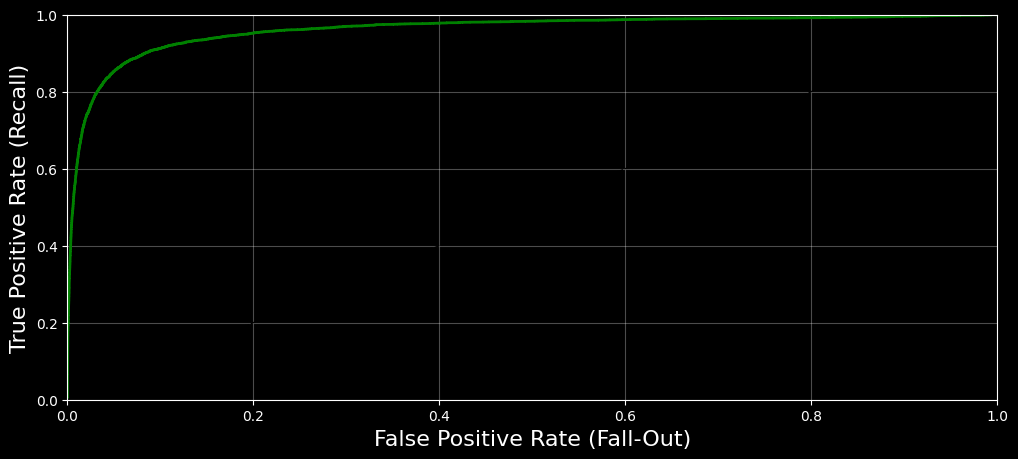

In [49]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    """
    fig, ax = plt.subplots(1,1,figsize=(12,5))
    ax.plot(fpr, tpr, linewidth=2, label=label,color='g')
    ax.plot([0, 1], [0, 1], 'k--',lw=1)
    ax.axis([0, 1, 0, 1]) 
    ax.set_xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    ax.set_ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(alpha=0.3)  
   


plot_roc_curve(fpr, tpr, label=None)

In [50]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [51]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

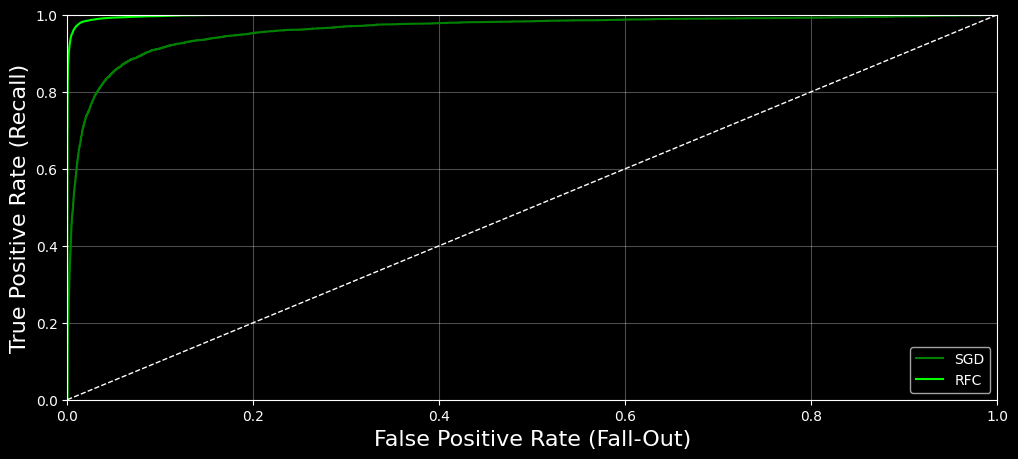

In [52]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.plot(fpr, tpr, linewidth=1.5, label='SGD',c='g')
ax.plot(fpr_forest, tpr_forest, linewidth=1.5, label='RFC',c='lime')
ax.plot([0, 1], [0, 1], 'w--',lw=1) 
ax.axis([0, 1, 0, 1])      
ax.set_xlabel('False Positive Rate (Fall-Out)', fontsize=16)
ax.set_ylabel('True Positive Rate (Recall)', fontsize=16)
ax.legend()
plt.grid(alpha=0.3)  

In [ ]:
# False Positive Rate -> Ratio of negative instances incorrectly classified as positive
# 1 - specificity

# TNR = Specificity

In [53]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [55]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

KeyboardInterrupt: 

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591